In [18]:
class Test:
    def __init__(self, abc='abc', defg='defg'):
        self.abc = abc
        self.defg = defg

    def __call__(self):
        print(self.abc)

test = Test(abc='123' if False else type(list), defg='789' if False else '101112')
test()

<class 'type'>


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

log_df = pd.read_csv("../tmp/models/protT5-CLIP-2025-01-12-14-13-15-ddp/training_log.csv")

similarity_cols = [col for col in log_df.columns if col.startswith('eval_all_similarities')]
for col in similarity_cols:
    log_df[col] = log_df[col].apply(lambda x: [v for v in eval(x) if v <= 0.99] if isinstance(x, str) else x)
    
for idx in log_df.index:
    similarities = []
    for col in similarity_cols:
        value = log_df.at[idx, col]
        if isinstance(value, list):
            similarities.extend(value)
    
    if similarities:
        log_df.at[idx, 'eval_min_cosine_similarity'] = min(similarities)
        log_df.at[idx, 'eval_max_cosine_similarity'] = max(similarities)
        log_df.at[idx, 'eval_std_cosine_similarity'] = pd.Series(similarities).std()
        log_df.at[idx, 'eval_mean_cosine_similarity'] = pd.Series(similarities).mean()


In [2]:
log_df

,eval_loss,eval_mean_cosine_similarity,eval_std_cosine_similarity,eval_min_cosine_similarity,eval_max_cosine_similarity,eval_all_similarities,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step,loss,grad_norm,learning_rate,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,2.810892,0.008133,0.022131,-0.059496,0.06047,"[0.007503499276936054, -0.020805232226848602, ...",6.7640,37.848,0.591,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004975,1,3.0257,1.627118,9.997927e-05,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009950,2,3.1254,4.646049,9.995854e-05,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014925,3,3.0442,1.685215,9.993781e-05,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019900,4,3.0441,2.020719,9.991708e-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.990050,4822,0.9216,10.291610,4.145937e-08,NaN,NaN,NaN,NaN,NaN
4973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.995025,4823,0.6848,7.842988,2.072968e-08,NaN,NaN,NaN,NaN,NaN
4974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,4824,0.6028,8.285851,0.000000e+00,NaN,NaN,NaN,NaN,NaN
4975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,4824,NaN,NaN,NaN,16703.7934,23.038,0.289,2.866166e+18,1.337127


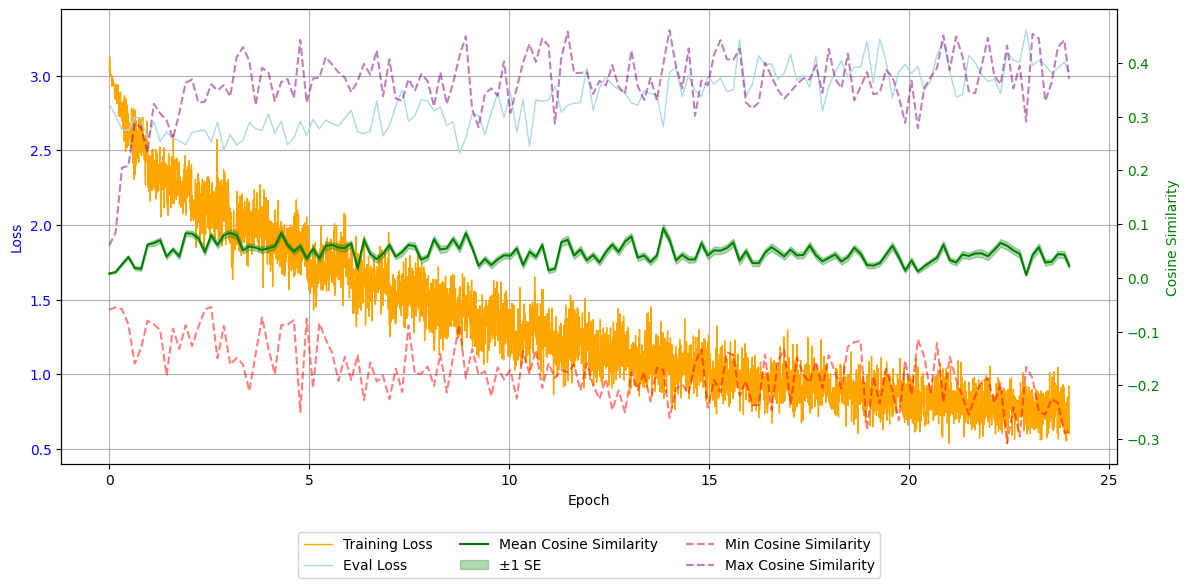

In [4]:
import yaml
from src.plots.train_plots import plot_training_history

with open("../configs/model.yaml", "r") as f:
    train_config = yaml.safe_load(f)

fig = plot_training_history(log_history=log_df, train_config=train_config)
